In [ ]:
# Instalar librerías necesarias
!pip install -q matplotlib numpy scikit-learn tensorflow

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

In [ ]:
# Cargamos los datos
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalizamos los datos
X_train = X_train / 255.0
X_test = X_test / 255.0

# Redimensionamos para CNN
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Codificamos las etiquetas
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
# Creamos el modelo
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

# Compilamos y entrenamos
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train_cat, epochs=3, validation_data=(X_test, y_test_cat))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 23ms/step - accuracy: 0.9149 - loss: 0.2908 - val_accuracy: 0.9813 - val_loss: 0.0570
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 21ms/step - accuracy: 0.9836 - loss: 0.0520 - val_accuracy: 0.9840 - val_loss: 0.0476
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.9898 - loss: 0.0331 - val_accuracy: 0.9811 - val_loss: 0.0594


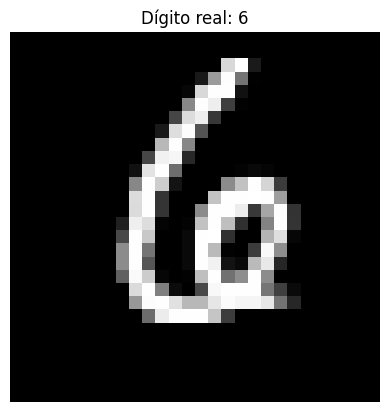

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
Predicción del modelo: 6


In [ ]:
# Elegimos una imagen de prueba
index = 123  # Puedes cambiar este número entre 0 y 9999
image = X_test[index]
true_label = y_test[index]

# Mostramos la imagen
plt.imshow(image.reshape(28, 28), cmap='gray')
plt.title(f'Dígito real: {true_label}')
plt.axis('off')
plt.show()

# Hacemos la predicción
pred = model.predict(image.reshape(1, 28, 28, 1))
print("Predicción del modelo:", np.argmax(pred))

***Aplicación de Métricas de Desempeño e Interpretabilidad del Modelo***

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
REPORTE DE CLASIFICACIÓN:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.99      0.98      0.99      1010
           4       0.98      0.99      0.98       982
           5       0.93      1.00      0.96       892
           6       1.00      0.95      0.97       958
           7       0.97      1.00      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.99      0.96      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



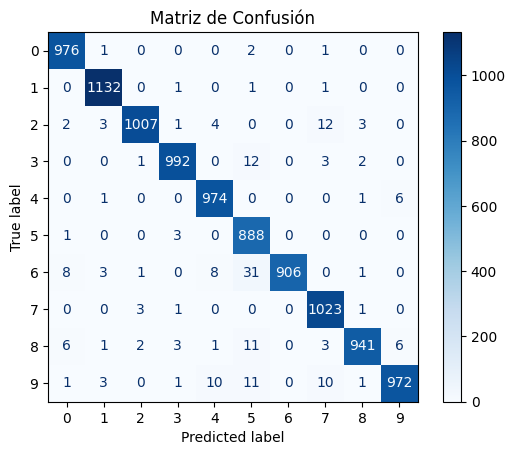

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Predecimos sobre los datos de prueba
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_cat, axis=1)  # y_test_cat está codificado one-hot

# Reporte de clasificación
print("REPORTE DE CLASIFICACIÓN:\n")
print(classification_report(y_true, y_pred_classes))

# Matriz de confusión
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.show()